In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

datos = pd.read_csv('iris.csv')
df = pd.DataFrame(datos)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [58]:
## HACEMOS UNA LIMPIEZA DEL DATAFRAME PARA VALORES QUE NO INFLUYEN
df = df.drop(['Id'], axis=1)

In [59]:
## OBSERVAMOS DISTRIBUCION DEL TARGET
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

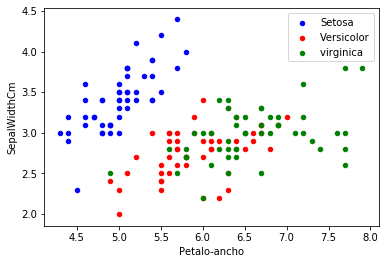

In [60]:
## GRAFICAMOS LAS COMPARACIONES DE LAS CARACTERISTICAS PARA CADA TIPO DE FLOR
## COMENZAREMOS CON LOS DATOS DE LA LONGITUD Y EL ANCHO  DE LOS SEPALOS 

fig = df[df['Species']=='Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Setosa')
df[df['Species']=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm', y='SepalWidthCm', color='red', label='Versicolor', ax = fig)
df[df['Species']=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm', y='SepalWidthCm', color='green', label='virginica ', ax = fig)
fig.set_xlabel('Petalo-longitud')
fig.set_xlabel('Petalo-ancho')
plt.show()

In [82]:
df = df.replace({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}).astype('category')

In [83]:
X = df.loc[:,['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y = df['Species']

#### REGULARIZACION:
Dentro del algoritmo se encuentra un hiperparametro 'C' este es aquel que nos permie manejar la regularizacion que ocurre con los coeficientes del algoritmo.

Entre mas grande sea 'C' MENOR SERA LA REGULARIZACION.

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20)
from sklearn.linear_model import LogisticRegression

## MODELO CON UNA REGULARIZACION DEBIL
model1 = LogisticRegression(solver='lbfgs',max_iter=1000, C=100)

## MODELO CON UNA REGULARIZACION FUERTE 
model2 = LogisticRegression(solver='lbfgs',max_iter=1000,C= 0.01 )

In [85]:
model1.fit(X_train,Y_train)
model2.fit(X_train,Y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
Y_predic = model1.predict(X_test)

In [87]:
## CALCULAMOS LAS PRECISIONES DE LOS MODELOS
print(model1.score(X_train,Y_train))
print(model2.score(X_train,Y_train))

0.9833333333333333
0.925


#### CONCLUSIONES
Una regularizacion muy fuerte puede provocar que se pierta el objetico de optimizar la precision

Regularized Loss = original Loss + large coefficient penalty

1.more regularization = Baja accuracy con datos de entrenamiento 

2.more regularization = 'Casi siempre' provoca una mejor accuracy con los datos de Test. Dependiendo de los datos.

Esto se explica ya que con una regularizacion menor se busca no caer en overfitting

In [88]:
print(model1.score(X_test,Y_test))
print(model2.score(X_test,Y_test))

1.0
0.9666666666666667


#### REGULARIZACION L1 Y L2
Para estos algoritmos lineales de clasificacion como lo son SVC y Logistic se puede usar tambien los metodos de penalizacion para las regresiones lineales:

L1. Lasso --> Seleccion de caracteristicas volviendo los coeficientes a 0 para eliminar esa caracteristica

L2. Rige  ---> Los reduce para que sean mas pequeños los coeficientes

In [67]:
## MODELO CON UNA REGULARIZACION DEBIL
model3 = LogisticRegression(penalty='l1')

## MODELO CON UNA REGULARIZACION FUERTE 
model3 = LogisticRegression(penalty='l2') # POR DEFECTO ES L2

#### METODOS DE EVALUACION

In [89]:
## ACCURACY
model1.score(X_test, Y_test)

1.0

In [69]:
## REPORTE DE LAS DIFERENES METRICAS
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_predic)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



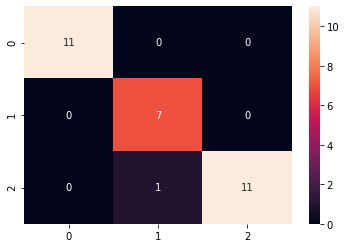

In [70]:
## MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_predic,Y_test)

import seaborn as sns
sns.heatmap(matrix, annot=True)
plt.show()